<a href="https://colab.research.google.com/github/omarespejel/ELIA_clases/blob/main/BETO_01_Importaci%C3%B3n_y_tokenizing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BETO (BERT) 01: Importación y tokenizing
por Omar U. Espejel (Twitter: [@espejelomar](https://twitter.com/espejelomar))

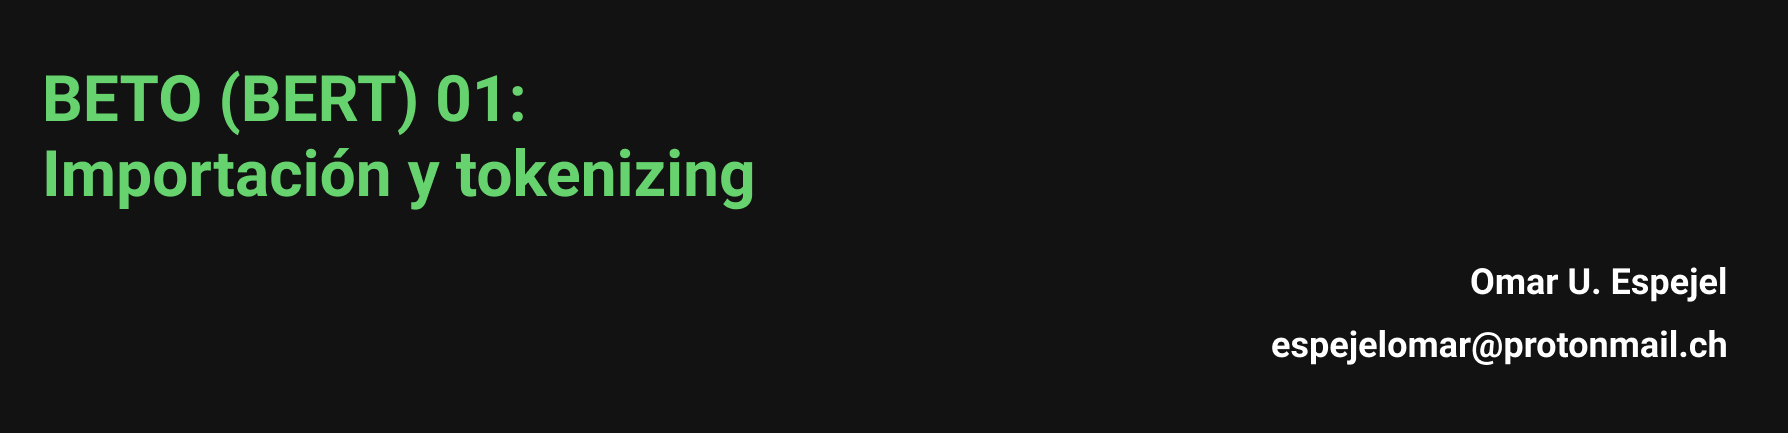


En mi newsletter encontrarás una guía que te ayude a iniciar el viaje por la programación del deep learning. Mi objetivo es guiarte desde tus primeros pasos, enseñándote las herramientas necesarias para hacer IA, hasta temas avanzados como los Transformers 🦾. Además, abordaremos casos prácticos para facilitar la comprensión de cada tema. 
 
Si estás interesado en un tema específico puedes escribirme vía Twitter (https://twitter.com/espejelomar?lang=en) 🐣. 
 
En este link (https://espejel.substack.com/p/coming-soon) te puedes suscribir completamente gratis 🙌. 
 
Para facilitar la comprensión de cada tema, especialmente al momento de programar, te invito a revisar nuestro diccionario inglés-español para programación (link (https://www.notion.so/Ingl-s-para-la-programaci-n-bab11d9db5014f16b840bf8d22c23ac2)).

El material aquí presente está inspirado por el modelo BETO originalmente en el [repositorio del Departamento de Ciencias de la Computación de la Universidad de Chile](https://github.com/dccuchile).


## Instalación de BETO

Primero instalamos BETO desde HuggingFace Hub. El repositorio con mayor cantidad de modelos open source.

In [ ]:
import torch
from transformers import BertForMaskedLM, BertTokenizer

Observamos que en efecto los datos correspondientes a BETO se encuentran en la carpeta pytorch.

In [ ]:
!ls pytorch/

config.json  pytorch_model.bin	vocab.txt


Si fueramos a utilizar el modelo BERT original, ya en la instalación de `transformers` que hicimos arriba, usaríamos el siguiente comando:

In [ ]:
# tokenizer_ingles = BertTokenizer.from_pretrained('bert-base-cased')

Para utilizar BETO tenemos que importar los datos que deliberadamente guardamos en la carpeta pyorch de nuestro ambiente. El tokenizador lo dejamos con `do_lower_case` para que sí podamos aceptar palabras con mayúsculas.

In [ ]:
tokenizer_español = BertTokenizer.from_pretrained("dccuchile/bert-base-spanish-wwm-cased", do_lower_case=False)

Downloading:   0%|          | 0.00/236k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/364 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/469k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/648 [00:00<?, ?B/s]

In [ ]:
tokenizer_español

PreTrainedTokenizer(name_or_path='dccuchile/bert-base-spanish-wwm-cased', vocab_size=31002, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [ ]:
BertTokenizer??

Si observamos el vocabulario con el que BETO está pre-entrenado observamos:



*  Primeras 977 palabras están reservadas en la forma [unusedK] y [MASK], [PAD], [EOS], [UNK], [CLS], [SEP]. Las celdas unused son para que agreguemos vocabulario que puede ser específico para nuestra aplicación.
* A partir del 978 vemos tokens para caracteres individuales, como números y letras.
*   Poco a poco comienzan surgir tokens que individualmente pueden ser palabras. Están ordenadas por frecuencia.
*   Hay palabras que pensaríamos no tan comunes en este contexto como "verga" e "hincha". ¿Cómo expresas la palabra verga en inglés? Por eso necesitamos nuestro propio vocabulario en español.
*   Todo el tiempo también vemos las subpalabras que comienzan con #








## *Tokenizing* con BETO

Tokenizer en acción

In [ ]:
enunciado = "BETO es clave para el desarrollo del NLP en América Latina."

In [ ]:
print('Original: ', enunciado)
print("Tokenizado: ", tokenizer_español.tokenize(enunciado))
print('IDs: ', tokenizer_español.convert_tokens_to_ids(tokenizer_español.tokenize(enunciado)))

Original:  BETO es clave para el desarrollo del NLP en América Latina.
Tokenizado:  ['BE', '##TO', 'es', 'clave', 'para', 'el', 'desarrollo', 'del', 'NL', '##P', 'en', 'América', 'Latina', '.']
IDs:  [13065, 6524, 1058, 5714, 1110, 1040, 1927, 1072, 15938, 30966, 1036, 4109, 9062, 1009]


Es más rápido si usamos `tokenizer_español.encode()` para convertir el texto primero en tokens y luego en IDs.

También se puede puede incluir el texto directamente en `tokenizer_español()` y nos retornará un diccionario en donde la *key* `input_ids` incluye los IDs que `tokenizer_español.encode()` también nos retornaría.







In [ ]:
tokenizer_español(enunciado)['input_ids']

[4,
 13065,
 6524,
 1058,
 5714,
 1110,
 1040,
 1927,
 1072,
 15938,
 30966,
 1036,
 4109,
 9062,
 1009,
 5]

In [ ]:
print(tokenizer_español.encode(enunciado))
print(tokenizer_español(enunciado))

[4, 13065, 6524, 1058, 5714, 1110, 1040, 1927, 1072, 15938, 30966, 1036, 4109, 9062, 1009, 5]
{'input_ids': [4, 13065, 6524, 1058, 5714, 1110, 1040, 1927, 1072, 15938, 30966, 1036, 4109, 9062, 1009, 5], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


Si tenemos dos textos se tendrá que crear un padding para convertir al mismo tamaño los tensores,

In [ ]:
texto_corto = "Este texto es corto"
texto_largo = "Este texto es largo y un poco aburrido"

corto_encoded = tokenizer_español(texto_corto)["input_ids"]
largo_encoded = tokenizer_español(texto_largo)["input_ids"]

len(corto_encoded), len(largo_encoded)

(6, 10)

In [ ]:
secuencia_con_padding = tokenizer_español([texto_corto, texto_largo], padding = True)

El padding lo notamos en en la `key` de `secuencia_con_padding` llamada `attention_mask`. Profundizemos en esto.

In [ ]:
secuencia_con_padding

{'input_ids': [[4, 2072, 3881, 1058, 6726, 5, 1, 1, 1, 1], [4, 2072, 3881, 1058, 2941, 1042, 1049, 1958, 15075, 5]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

Como tal, tokenizer nos devuelve un diccionario con tres keys: `'input_ids', 'token_type_ids', 'attention_mask'`. En este momento solo queremos mostrar `input_ids`. Interesantemente, con BETO el padding se realiza con el token especial `[PAD]` (el 1) en vez de con un cero, pues esta posición está reservada para el token especial `[MASK]`.

In [ ]:
secuencia_con_padding.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
secuencia_con_padding['input_ids']

[[4, 2072, 3881, 1058, 6726, 5, 1, 1, 1, 1],
 [4, 2072, 3881, 1058, 2941, 1042, 1049, 1958, 15075, 5]]

Podemos usar un el método `decode` de nuestro tokenizer para observar lo que cada id significa.

In [ ]:
tokenizer_español.decode(secuencia_con_padding['input_ids'][0]), tokenizer_español.decode(secuencia_con_padding['input_ids'][1])

('[CLS] Este texto es corto [SEP] [PAD] [PAD] [PAD] [PAD]',
 '[CLS] Este texto es largo y un poco aburrido [SEP]')

Con `attention_mask` podemos ver la parte de los enunciados que tuvieron padding. A pesar de que el padding se realizó con el token 1 en vez del 0, notamos que la `attention_mask` detecta sin nigún problema donde se realizó el padding.

In [ ]:
secuencia_con_padding['attention_mask']

[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

La última key producto de aplicar tokenizer es `token_type_ids`. Esta nos ayudará para tareas como clasificación de secuencias o para responder preguntas. Lo que hacemos es unir nuestros textos en una sola secuencia con ayuda de los tokens especiales 5 `[CLS]` y 6 `[SEP]`. 

El modelo junta ambas secuencias en un único tensor. Por ejemplo, en el caso de resolver una pregunta, la pregunta quedaría con 0s y la respuesta con 1s en nuestra `token_type_ids`.

In [ ]:
secuencia = tokenizer_español("Esta clase es sobre cómo utilizar BETO", "¿Sobre qué es esta clase?")

In [ ]:
secuencia["token_type_ids"], tokenizer_español.decode(secuencia['input_ids'])

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 '[CLS] Esta clase es sobre cómo utilizar BETO [SEP] ¿ Sobre qué es esta clase? [SEP]')

Notamos que nos une ambos enunciados en uno solo, no hay necesidad de usar padding.

## Lo que sigue...

En el siguiente *notebook* importaremos un dataset original y lo preparemos con BETO para clasificación.